# Intelligent k-means  
1. Find c, the centre of the data set (i.e. mean of all data, per feature). and Set Z={}.
2. Find t, the farthest point from c.
3. run k-means on the data set with 2 centroids. That is c and t (i.e. k=2). REMEMBER: c does not move. This will find clusters S1 (with t) and S2(with c)
4. If |S1|>= theta (a parameter) then save t to Z.
5. Remove S1 from Data set.
6. If there is still data, go back to Step 2.
7. Run the usual kmeans on the whole data set with k=|Z|, and the points in Z as initial centroids.  

* If you know K:  
    * In Step 4 (when you save t to Z) save also the value of |S1| (and set theta to 1)
    * New step (between 6 and 7). Select from Z the K values of t with the highest cardinality. Remove all other values from Z

In [1]:
from sklearn.datasets import load_iris
import numpy as np
# Load the Iris dataset
iris = load_iris()

# Access the features (X) and target (y) data
X = iris.data
y = iris.target

import numpy as np
def normalizer(data):
    return (data - np.mean(data,axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
X = normalizer(X)


In [2]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

# 1
 Find c, the centre of the data set (i.e. mean of all data, per feature).And Set Z={}


In [3]:

c = np.mean(X, axis=0)
c

array([-2.82089167e-16, -3.36628873e-16, -3.93389025e-16, -2.94209102e-16])

In [4]:
D = euclidean(c, X)
D

array([0.64012732, 0.63430491, 0.67182024, 0.66290634, 0.66265547,
       0.60913166, 0.66318313, 0.62857853, 0.70579584, 0.65212171,
       0.63774484, 0.64151398, 0.67387471, 0.77274208, 0.71817314,
       0.75627884, 0.65033416, 0.61384039, 0.59952375, 0.65213157,
       0.57497962, 0.60969986, 0.74986883, 0.50934904, 0.6139458 ,
       0.60217119, 0.56566002, 0.6211303 , 0.6208294 , 0.64153002,
       0.62567623, 0.54124425, 0.759579  , 0.75424527, 0.62356037,
       0.6478923 , 0.62454704, 0.69952374, 0.71292077, 0.61876342,
       0.63472666, 0.74350227, 0.71499579, 0.53389203, 0.5903288 ,
       0.62024913, 0.66749722, 0.67522068, 0.64368599, 0.63103842,
       0.37315869, 0.24280598, 0.37366951, 0.33483211, 0.28430664,
       0.17509261, 0.28227103, 0.39573062, 0.26570916, 0.24834048,
       0.50771747, 0.14874564, 0.37159412, 0.20460487, 0.10650247,
       0.2752701 , 0.19144247, 0.18047461, 0.41101602, 0.24655267,
       0.31242844, 0.14149733, 0.35096764, 0.20511335, 0.19597

In [6]:
Z={}

# 2 
Find t, the farthest point from c.

In [7]:

# D is the list of Distances to the Center of all data
D = euclidean(c, X)
ind_t = np.argmax(D)
t = X[ind_t]
t

array([ 0.51574074, -0.19055556,  0.53254237,  0.45861111])

In [8]:
ind_t

118

In [9]:
D

array([0.64012732, 0.63430491, 0.67182024, 0.66290634, 0.66265547,
       0.60913166, 0.66318313, 0.62857853, 0.70579584, 0.65212171,
       0.63774484, 0.64151398, 0.67387471, 0.77274208, 0.71817314,
       0.75627884, 0.65033416, 0.61384039, 0.59952375, 0.65213157,
       0.57497962, 0.60969986, 0.74986883, 0.50934904, 0.6139458 ,
       0.60217119, 0.56566002, 0.6211303 , 0.6208294 , 0.64153002,
       0.62567623, 0.54124425, 0.759579  , 0.75424527, 0.62356037,
       0.6478923 , 0.62454704, 0.69952374, 0.71292077, 0.61876342,
       0.63472666, 0.74350227, 0.71499579, 0.53389203, 0.5903288 ,
       0.62024913, 0.66749722, 0.67522068, 0.64368599, 0.63103842,
       0.37315869, 0.24280598, 0.37366951, 0.33483211, 0.28430664,
       0.17509261, 0.28227103, 0.39573062, 0.26570916, 0.24834048,
       0.50771747, 0.14874564, 0.37159412, 0.20460487, 0.10650247,
       0.2752701 , 0.19144247, 0.18047461, 0.41101602, 0.24655267,
       0.31242844, 0.14149733, 0.35096764, 0.20511335, 0.19597

# 3
run k-means on the data set with 2 centroids. That is c and t (i.e. k=2).  
REMEMBER: c does not move. This will find clusters S1 (with t) and S2(with c)

## 3.1 Calculation of distances of points to 2 centers


In [10]:
# D_clusters is the list of tuples where first element is distance of point x  to  Center,
# and second element is the distance of that point to t
D_clusters = [(a,b) for a,b in zip(euclidean(c, X), euclidean(t, X))]
D_clusters


[(0.640127323694405, 1.5155388804920498),
 (0.6343049133109797, 1.505770304327392),
 (0.6718202415519157, 1.5567466053077967),
 (0.662906343355017, 1.5453900615477882),
 (0.6626554688339579, 1.5397205172116797),
 (0.609131661458607, 1.45089840459788),
 (0.6631831261822927, 1.5543715968989071),
 (0.6285785331394114, 1.508948783088743),
 (0.7057958374790212, 1.5781416089151405),
 (0.6521217074249925, 1.5252242936808935),
 (0.6377448413054864, 1.4904911189483854),
 (0.6415139818381471, 1.5272877559509286),
 (0.6738747111612295, 1.5446612795863908),
 (0.772742080012449, 1.65118740089812),
 (0.7181731445057643, 1.5224337901570477),
 (0.7562788375610046, 1.5282566555698816),
 (0.6503341565289145, 1.493053398217047),
 (0.6138403925917538, 1.491870484568798),
 (0.5995237498801322, 1.4247367121623533),
 (0.6521315675361775, 1.5178075311415264),
 (0.5749796224010971, 1.4358632952641752),
 (0.6096998562493889, 1.4819246987283283),
 (0.749868833356331, 1.6372991347918449),
 (0.5093490382043714, 1.

## 3.2 Clustering based on distances

In [11]:
clusters = np.argmin(D_clusters, axis=1)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [12]:
# the maximum distance to c
np.max(D_clusters,axis=0)[0]

0.8923146651050666

In [13]:
# to check if distance with the farthest point (second element) is zero
D_clusters[ind_t]

(0.8923146651050666, 0.0)

## 3.3 update t

In [14]:
cluster_t_indexes = list(np.where(clusters == 1)[0])
cluster_t_indexes

[100,
 102,
 104,
 105,
 107,
 108,
 109,
 112,
 115,
 117,
 118,
 120,
 122,
 124,
 125,
 128,
 129,
 130,
 131,
 132,
 135,
 136,
 139,
 140,
 141,
 143,
 144,
 145]

In [15]:
cluster_t = X[cluster_t_indexes]
cluster_t

array([[ 0.12685185,  0.10111111,  0.38      ,  0.54194444],
       [ 0.34907407, -0.02388889,  0.36305085,  0.37527778],
       [ 0.18240741, -0.02388889,  0.34610169,  0.41694444],
       [ 0.48796296, -0.02388889,  0.48169492,  0.37527778],
       [ 0.40462963, -0.06555556,  0.43084746,  0.25027778],
       [ 0.23796296, -0.23222222,  0.34610169,  0.25027778],
       [ 0.37685185,  0.22611111,  0.39694915,  0.54194444],
       [ 0.26574074, -0.02388889,  0.29525424,  0.37527778],
       [ 0.15462963,  0.05944444,  0.26135593,  0.45861111],
       [ 0.51574074,  0.30944444,  0.49864407,  0.41694444],
       [ 0.51574074, -0.19055556,  0.53254237,  0.45861111],
       [ 0.29351852,  0.05944444,  0.32915254,  0.45861111],
       [ 0.51574074, -0.10722222,  0.49864407,  0.33361111],
       [ 0.23796296,  0.10111111,  0.32915254,  0.37527778],
       [ 0.37685185,  0.05944444,  0.38      ,  0.25027778],
       [ 0.15462963, -0.10722222,  0.31220339,  0.37527778],
       [ 0.37685185, -0.

In [16]:
new_t = np.mean(X[cluster_t_indexes], axis=0)
new_t

array([0.31931217, 0.01777778, 0.36244552, 0.4005754 ])

## 3.4
Put it in while loop and break when cluster_t does not chang


In [17]:
cluster_t_indexes = []
counter = 0
while True:
    D_clusters = [(a,b) for a,b in zip(euclidean(c, X), euclidean(t, X))]

    clusters = np.argmin(D_clusters, axis=1)

    new_cluster_t_indexes = list(np.where(clusters == 1)[0])

    t = np.mean(X[new_cluster_t_indexes], axis=0)
    
    counter += 1
    if cluster_t_indexes != new_cluster_t_indexes:
        cluster_t_indexes = new_cluster_t_indexes
        continue
    else:
        break

print(cluster_t_indexes)
print(counter)

[50, 52, 54, 56, 70, 72, 76, 77, 83, 86, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
6


In [18]:
len(cluster_t_indexes)

59

# 4
If |S1|>= theta (a parameter) then save t to Z.

In [19]:
theta = 1
cluster_t_cardinality = len(cluster_t_indexes)
if cluster_t_cardinality >= 1:

    Z[0] = (t, cluster_t_cardinality)
print(Z)

{0: (array([ 0.2111268 , -0.03165725,  0.28606148,  0.31313089]), 59)}


In [20]:
Z.items()
[v[0] for k,v in Z.items()] # --> [t]
[v[1] for k,v in Z.items()] # --> [cluster_t_cardinality]

[59]

In [21]:
t

array([ 0.2111268 , -0.03165725,  0.28606148,  0.31313089])

In [22]:
assert (t == list(Z[0])[0]).all()
assert (cluster_t_cardinality == list(Z[0])[-1])

# 5
Remove S1 from Data set.


In [23]:
# Residual indexes, after removing the cluster_t_indexes
res_indexes = list(set(np.arange(X.shape[0])) - set(cluster_t_indexes))
X = X[res_indexes]

# 6 
If there is still data, go back to Step 2.


In [24]:
if len(res_indexes) >= 0:
    pass
 # go to step 2 
    

# 7
Run the usual kmeans on the whole data set with k=|Z|, and the points in Z as initial centroids.  

In [25]:
from sklearn.cluster import KMeans

# Specify the number of clusters (K)
k = len(Z)
init_centers = [v for k,v in Z.items()]

# Create the KMeans object
kmeans = KMeans(n_clusters=k, init=init_centers)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster centers and the labels for each data point
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_


/home/mehrdad/anaconda3/envs/ai/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mehrdad/anaconda3/envs/ai/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1, 2) + inhomogeneous part.

Lets put everything together


In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
# Load the Iris dataset
iris = load_iris()

# Access the features (X) and target (y) data
X = iris.data
y = iris.target

import numpy as np
def normalizer(data):
    return (data - np.mean(data,axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
X = normalizer(X)
X_copy = X.copy()


def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))



i_clusters = 0 # Number of clusters that we have found
#1
c = np.mean(X, axis=0) # c is not going to change in the loop

while True:

    #2 D is the list of Distances to the Center of all data
    D = euclidean(c, X)
    ind_t = np.argmax(D) # the farthest point to c
    t = X[ind_t]

    #3
    cluster_t_indexes = []
    while True:
        D_clusters = [(a,b) for a,b in zip(euclidean(c, X), euclidean(t, X))]

        clusters = np.argmin(D_clusters, axis=1)

        new_cluster_t_indexes = list(np.where(clusters == 1)[0])

        t = np.mean(X[new_cluster_t_indexes], axis=0)
        
        # counter += 1
        if cluster_t_indexes != new_cluster_t_indexes:
            cluster_t_indexes = new_cluster_t_indexes
            continue
        else:
            break
        
    #4
    theta = 1
    if len(cluster_t_indexes) >= theta:
        Z[i_clusters] = t
        i_clusters += 1 
    # else:
    #     print('Cardinality for Cluster {t} is less than Theta ({theta})')
    #     break # What should we do here? Remove cluster_t? 

    #5 Residual indexes, after removing the cluster_t_indexes
    res_indexes = list(set(np.arange(X.shape[0])) - set(cluster_t_indexes))
    X = X[res_indexes]

    #6
    if len(res_indexes) > 0:
        continue
    else:
        break
    
#7

# Specify the number of clusters (K)
k = len(Z)
init_centers = [v for k,v in Z.items()]

# Create the KMeans object
kmeans = KMeans(n_clusters=k, init=init_centers)

# Fit the model to the data
kmeans.fit(X_copy)

# Get the cluster centers and the labels for each data point
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_


/home/mehrdad/anaconda3/envs/unsupervised/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mehrdad/anaconda3/envs/unsupervised/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
Z

{0: array([ 0.2111268 , -0.03165725,  0.28606148,  0.31313089]),
 1: array([-0.23259259,  0.15444444, -0.38915254, -0.39722222]),
 2: array([-0.08981481, -0.25097222,  0.02322034, -0.00597222]),
 3: array([ 0.08981481, -0.035     ,  0.11672316,  0.08083333]),
 4: array([-0.12314815, -0.02388889,  0.12576271,  0.12527778]),
 5: array([-0.05092593, -0.05722222,  0.04779661,  0.03361111])}

{0: array([ 0.2111268 , -0.03165725,  0.28606148,  0.31313089]),
 1: array([-0.23259259,  0.15444444, -0.38915254, -0.39722222]),
 2: array([-0.08981481, -0.25097222,  0.02322034, -0.00597222]),
 3: array([ 0.08981481, -0.035     ,  0.11672316,  0.08083333]),
 4: array([-0.12314815, -0.02388889,  0.12576271,  0.12527778]),
 5: array([-0.05092593, -0.05722222,  0.04779661,  0.03361111])}

In [26]:
cluster_centers

NameError: name 'cluster_centers' is not defined

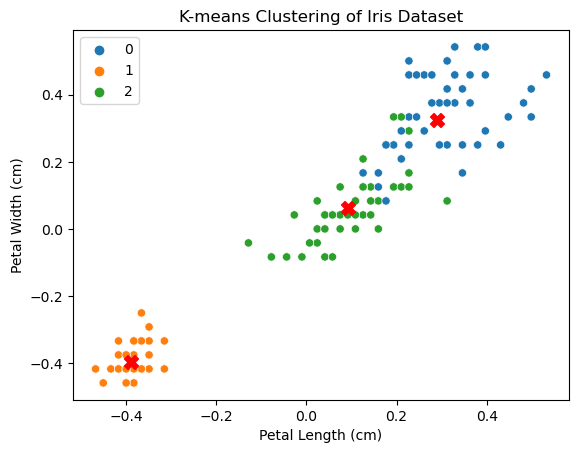

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already performed K-means clustering and obtained the cluster labels and centers

# Create a scatter plot of the data points colored by cluster
sns.scatterplot(x=X_copy[:, 2], y=X_copy[:, 3], hue=labels, palette='tab10')
plt.scatter(cluster_centers[:, 2], cluster_centers[:, 3], marker='X', color='red', s=100)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-means Clustering of Iris Dataset')
plt.show()

## Second part of Intelligent K-means

In [31]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np
# Load the Iris dataset
iris = load_iris()

# Access the features (X) and target (y) data
X = iris.data
y = iris.target

import numpy as np
def normalizer(data):
    return (data - np.mean(data,axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))
X = normalizer(X)
X_copy = X.copy()

true_k = 3

i_clusters = 0 # Number of clusters that we have found
#1
c = np.mean(X, axis=0) # c is not going to change in the loop
Z = {}

while True:

    #2 D is the list of Distances to the Center of all data
    D = euclidean(c, X)
    ind_t = np.argmax(D) # the farthest point to c
    t = X[ind_t]

    #3
    cluster_t_indexes = []
    while True:
        D_clusters = [(a,b) for a,b in zip(euclidean(c, X), euclidean(t, X))]

        clusters = np.argmin(D_clusters, axis=1)

        new_cluster_t_indexes = list(np.where(clusters == 1)[0])

        t = np.mean(X[new_cluster_t_indexes], axis=0)
        
        # counter += 1
        if cluster_t_indexes != new_cluster_t_indexes:
            cluster_t_indexes = new_cluster_t_indexes
            continue
        else:
            break
        
    #4
    theta = 1
    cluster_t_cardinality =len(cluster_t_indexes)
    if cluster_t_cardinality >= theta:
        Z[i_clusters] = (t, cluster_t_cardinality)
        i_clusters += 1 
    # else:
    #     print('Cardinality for Cluster {t} is less than Theta ({theta})')
    #     break # What should we do here? Remove cluster_t? 

    #5 Residual indexes, after removing the cluster_t_indexes
    res_indexes = list(set(np.arange(X.shape[0])) - set(cluster_t_indexes))
    X = X[res_indexes]

    #6
    if len(res_indexes) > 0:
        continue
    else:
        break
#6.5

deducted_z = [v for k, v in Z.items()]
deducted_z = sorted(deducted_z, key=lambda x: x[-1], reverse = True)
deducted_z = deducted_z[:true_k]
deducted_z = [zz[0] for zz in deducted_z]
deducted_z = np.array(deducted_z)
    
#7

# Specify the number of clusters (K)
k = len(deducted_z)
# init_centers = [v[0] for k,v in Z.items()]

# Create the KMeans object
kmeans = KMeans(n_clusters=true_k, init=deducted_z)

# Fit the model to the data
kmeans.fit(X_copy)

# Get the cluster centers and the labels for each data point
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_


/home/mehrdad/anaconda3/envs/ai/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mehrdad/anaconda3/envs/ai/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
cluster_centers

array([[ 0.23903134,  0.00255342,  0.28971317,  0.32399573],
       [-0.23259259,  0.15444444, -0.38915254, -0.39722222],
       [-0.01666667, -0.16364583,  0.0915113 ,  0.06277778]])

In [33]:
np.array(deducted_z)

array([[ 0.2111268 , -0.03165725,  0.28606148,  0.31313089],
       [-0.23259259,  0.15444444, -0.38915254, -0.39722222],
       [-0.08981481, -0.25097222,  0.02322034, -0.00597222]])

In [34]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

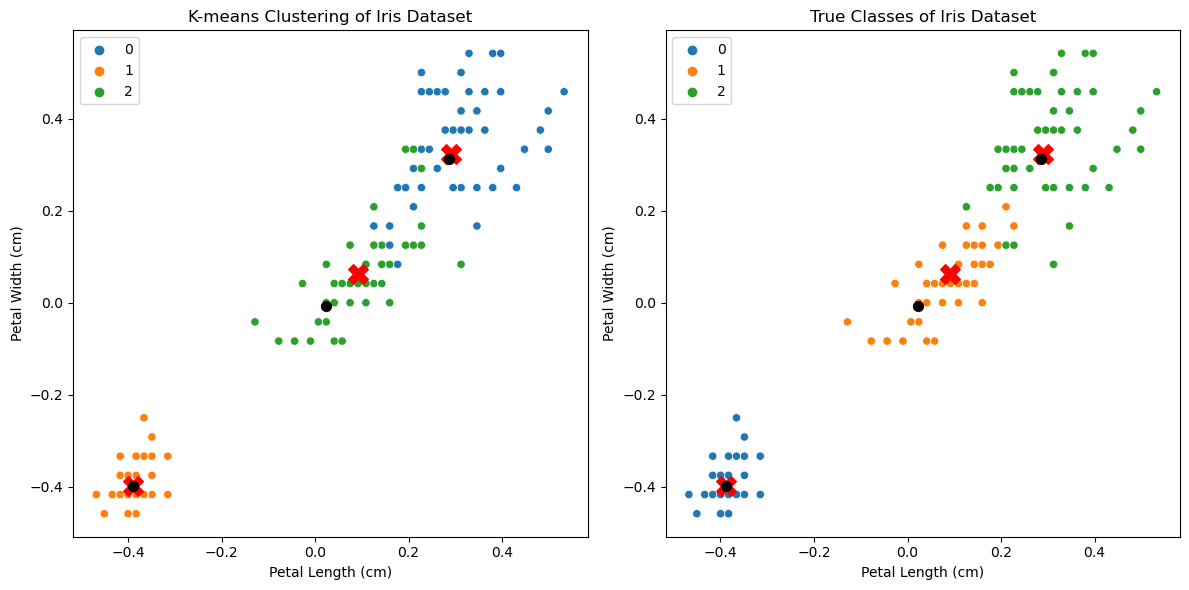

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Subplot 1: K-means Clustering
sns.scatterplot(x=X_copy[:, 2], y=X_copy[:, 3], hue=labels, palette='tab10', ax=axes[0])
axes[0].scatter(cluster_centers[:, 2], cluster_centers[:, 3], marker='X', color='red', s=200)
axes[0].scatter(deducted_z[:, 2], deducted_z[:, 3], marker='o', color='black', s=50)
axes[0].set_xlabel('Petal Length (cm)')
axes[0].set_ylabel('Petal Width (cm)')
axes[0].set_title('K-means Clustering of Iris Dataset')

# Subplot 2: True Classes
sns.scatterplot(x=X_copy[:, 2], y=X_copy[:, 3], hue=y, palette='tab10', ax=axes[1])
axes[1].scatter(cluster_centers[:, 2], cluster_centers[:, 3], marker='X', color='red', s=200)
axes[1].scatter(deducted_z[:, 2], deducted_z[:, 3], marker='o', color='black', s=50)
axes[1].set_xlabel('Petal Length (cm)')
axes[1].set_ylabel('Petal Width (cm)')
axes[1].set_title('True Classes of Iris Dataset')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()